In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import clamped_beam_wod as cbe
import sys

import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD
from flexmbd.utils import rot

from random import randint
import tensorflow as tf


In [2]:
### For better gpu usage ###

configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

In [3]:
## Function for dataframes ##

def dframefunc(force):
    
    ### Values for dataset creation, only force differs on each set###

    n_elem = 40
    l = 1
    h = 0.02
    E = 2e11
    nu = 0.3
    rho = 7801
    Fy = force
    f_array = []
    
    
    vals = cbe.generate(n_elem, l, h, E, nu, rho, Fy) ## Generating data
    
    dframe = pd.DataFrame()
    
    for i in range(len(vals[0])): ## Creating the dataframe out of generated data
        dframe[i] = pd.DataFrame(vals[0][i])

    return [dframe, vals[2], vals[1]]

FEM: end displacement is 25 mm, rotation 2.149 deg
MBD: end displacement is 24.966 mm, rotation 2.146 deg
10001
FEM: end displacement is 62.5 mm, rotation 5.371 deg
MBD: end displacement is 61.972 mm, rotation 5.335 deg
10001
FEM: end displacement is 100 mm, rotation 8.594 deg
MBD: end displacement is 97.899 mm, rotation 8.449 deg
10001
FEM: end displacement is 125 mm, rotation 10.74 deg
MBD: end displacement is 121 mm, rotation 10.47 deg
10001
Generating datasets done!


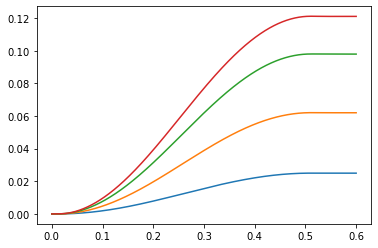

In [4]:
## Generating dataframes for model ##
dframe0 = dframefunc(200)[0]
dframe1 = dframefunc(500)[0]     
dframe2 = dframefunc(800)[0]
dframe3 = dframefunc(1000)[0]
print ( "Generating datasets done!" )

In [5]:
## Combining the dataframes ##

combined_valsX = pd.concat([dframe1.iloc[:-1], dframe2.iloc[:-1], dframe3.iloc[:-1], dframe0.iloc[:-1]]) ## drop the last for every simulation set as combining them
combined_valsY = pd.concat([dframe1.iloc[1: , :] , dframe2.iloc[1: , :], dframe3.iloc[1: , :], dframe0.iloc[1: , :]]) ## drop the first for every simulation set as combining them

## Inputs and outputs ##
X = combined_valsX
Y = combined_valsY
 

In [6]:
### CUSTOM LOSS FUNCTION ###

### using keras as backed for loss function ###

def custom_loss(y_true, y_pred):
    
    loss = K.square(y_pred - y_true) 
    loss = loss * 0.4
    
    
    return loss

In [7]:
### CREATING NN MODEL ###

model=Sequential([Dense(50,input_shape=(50,), activation="relu"),
                  Dense(64,activation="relu"),
                  Dense(64,activation="relu"),
                  Dense(50)])

model.compile(Adam(lr=0.00001),loss=tf.keras.losses.MeanSquaredError())

In [8]:
###TRAINING OF MODEL ###

history = model.fit(X, Y, epochs=500, validation_split = 0.1, batch_size=32)

##callbacks= [keras.callbacks.EarlyStopping(patience=30)],

Epoch 1/500
1125/1125 [==============================] - 1s 788us/step - loss: 0.0365 - val_loss: 0.0270
Epoch 2/500
1125/1125 [==============================] - 1s 615us/step - loss: 0.0184 - val_loss: 0.0092
Epoch 3/500
1125/1125 [==============================] - 1s 679us/step - loss: 0.0040 - val_loss: 9.6929e-04
Epoch 4/500
1125/1125 [==============================] - 1s 667us/step - loss: 4.3926e-04 - val_loss: 3.3549e-04
Epoch 5/500
1125/1125 [==============================] - 1s 675us/step - loss: 2.9320e-04 - val_loss: 2.8423e-04
Epoch 6/500
1125/1125 [==============================] - 1s 615us/step - loss: 2.5211e-04 - val_loss: 2.2242e-04
Epoch 7/500
1125/1125 [==============================] - 1s 609us/step - loss: 1.9757e-04 - val_loss: 1.5249e-04
Epoch 8/500
1125/1125 [==============================] - 1s 637us/step - loss: 1.3786e-04 - val_loss: 9.4193e-05
Epoch 9/500
1125/1125 [==============================] - 1s 614us/step - loss: 8.2007e-05 - val_loss: 4.8493e-05
Epo

1125/1125 [==============================] - 1s 631us/step - loss: 3.8378e-07 - val_loss: 1.5084e-07
Epoch 74/500
1125/1125 [==============================] - 1s 643us/step - loss: 3.7960e-07 - val_loss: 1.3088e-07
Epoch 75/500
1125/1125 [==============================] - 1s 627us/step - loss: 3.7476e-07 - val_loss: 1.5761e-07
Epoch 76/500
1125/1125 [==============================] - 1s 614us/step - loss: 3.7203e-07 - val_loss: 1.2365e-07
Epoch 77/500
1125/1125 [==============================] - 1s 656us/step - loss: 3.6701e-07 - val_loss: 1.2524e-07
Epoch 78/500
1125/1125 [==============================] - 1s 633us/step - loss: 3.6371e-07 - val_loss: 1.7273e-07
Epoch 79/500
1125/1125 [==============================] - 1s 598us/step - loss: 3.6071e-07 - val_loss: 1.4087e-07
Epoch 80/500
1125/1125 [==============================] - 1s 688us/step - loss: 3.5591e-07 - val_loss: 1.4422e-07
Epoch 81/500
1125/1125 [==============================] - 1s 648us/step - loss: 3.5188e-07 - val_loss

1125/1125 [==============================] - 1s 667us/step - loss: 1.3662e-07 - val_loss: 8.3813e-08
Epoch 145/500
1125/1125 [==============================] - 1s 695us/step - loss: 1.3368e-07 - val_loss: 8.0046e-08
Epoch 146/500
1125/1125 [==============================] - 1s 724us/step - loss: 1.3179e-07 - val_loss: 1.0328e-07
Epoch 147/500
1125/1125 [==============================] - 1s 715us/step - loss: 1.2989e-07 - val_loss: 7.6943e-08
Epoch 148/500
1125/1125 [==============================] - 1s 753us/step - loss: 1.2796e-07 - val_loss: 6.2629e-08
Epoch 149/500
1125/1125 [==============================] - 1s 804us/step - loss: 1.2550e-07 - val_loss: 6.1671e-08
Epoch 150/500
1125/1125 [==============================] - 1s 753us/step - loss: 1.2384e-07 - val_loss: 8.6471e-08
Epoch 151/500
1125/1125 [==============================] - 1s 729us/step - loss: 1.2221e-07 - val_loss: 9.2716e-08
Epoch 152/500
1125/1125 [==============================] - 1s 715us/step - loss: 1.2035e-07 - 

1125/1125 [==============================] - 1s 680us/step - loss: 6.5046e-08 - val_loss: 5.5302e-08
Epoch 216/500
1125/1125 [==============================] - 1s 674us/step - loss: 6.4719e-08 - val_loss: 5.9198e-08
Epoch 217/500
1125/1125 [==============================] - 1s 647us/step - loss: 6.4228e-08 - val_loss: 5.1422e-08
Epoch 218/500
1125/1125 [==============================] - 1s 682us/step - loss: 6.3620e-08 - val_loss: 5.1725e-08
Epoch 219/500
1125/1125 [==============================] - ETA: 0s - loss: 6.3292e-0 - 1s 710us/step - loss: 6.3294e-08 - val_loss: 4.9540e-08
Epoch 220/500
1125/1125 [==============================] - 1s 667us/step - loss: 6.2968e-08 - val_loss: 5.0821e-08
Epoch 221/500
1125/1125 [==============================] - 1s 756us/step - loss: 6.2534e-08 - val_loss: 5.7768e-08
Epoch 222/500
1125/1125 [==============================] - 1s 729us/step - loss: 6.2001e-08 - val_loss: 6.4914e-08
Epoch 223/500
1125/1125 [==============================] - 1s 739u

Epoch 286/500
1125/1125 [==============================] - 1s 780us/step - loss: 4.2803e-08 - val_loss: 4.6855e-08
Epoch 287/500
1125/1125 [==============================] - 1s 717us/step - loss: 4.2597e-08 - val_loss: 5.0980e-08
Epoch 288/500
1125/1125 [==============================] - 1s 689us/step - loss: 4.2506e-08 - val_loss: 5.5788e-08
Epoch 289/500
1125/1125 [==============================] - 1s 710us/step - loss: 4.2263e-08 - val_loss: 5.0509e-08
Epoch 290/500
1125/1125 [==============================] - 1s 761us/step - loss: 4.1963e-08 - val_loss: 4.7686e-08
Epoch 291/500
1125/1125 [==============================] - 1s 726us/step - loss: 4.1946e-08 - val_loss: 4.8260e-08
Epoch 292/500
1125/1125 [==============================] - 1s 760us/step - loss: 4.1658e-08 - val_loss: 5.3458e-08
Epoch 293/500
1125/1125 [==============================] - 1s 721us/step - loss: 4.1566e-08 - val_loss: 4.8740e-08
Epoch 294/500
1125/1125 [==============================] - 1s 695us/step - loss:

1125/1125 [==============================] - 1s 674us/step - loss: 3.5354e-08 - val_loss: 4.1712e-08
Epoch 358/500
1125/1125 [==============================] - 1s 626us/step - loss: 3.5284e-08 - val_loss: 4.1186e-08
Epoch 359/500
1125/1125 [==============================] - 1s 620us/step - loss: 3.5200e-08 - val_loss: 5.2988e-08
Epoch 360/500
1125/1125 [==============================] - 1s 666us/step - loss: 3.5084e-08 - val_loss: 5.3596e-08
Epoch 361/500
1125/1125 [==============================] - 1s 748us/step - loss: 3.5257e-08 - val_loss: 4.8862e-08
Epoch 362/500
1125/1125 [==============================] - 1s 646us/step - loss: 3.5209e-08 - val_loss: 4.0948e-08
Epoch 363/500
1125/1125 [==============================] - 1s 607us/step - loss: 3.5029e-08 - val_loss: 4.4648e-08
Epoch 364/500
1125/1125 [==============================] - 1s 680us/step - loss: 3.4939e-08 - val_loss: 5.0202e-08
Epoch 365/500
1125/1125 [==============================] - 1s 696us/step - loss: 3.4945e-08 - 

1125/1125 [==============================] - 1s 781us/step - loss: 3.3367e-08 - val_loss: 5.0487e-08
Epoch 429/500
1125/1125 [==============================] - 1s 629us/step - loss: 3.3309e-08 - val_loss: 5.3776e-08
Epoch 430/500
1125/1125 [==============================] - 1s 664us/step - loss: 3.3265e-08 - val_loss: 4.8893e-08
Epoch 431/500
1125/1125 [==============================] - 1s 631us/step - loss: 3.3207e-08 - val_loss: 4.2301e-08
Epoch 432/500
1125/1125 [==============================] - 1s 621us/step - loss: 3.3272e-08 - val_loss: 4.7080e-08
Epoch 433/500
1125/1125 [==============================] - 1s 716us/step - loss: 3.3337e-08 - val_loss: 4.4890e-08
Epoch 434/500
1125/1125 [==============================] - 1s 647us/step - loss: 3.3243e-08 - val_loss: 4.4456e-08
Epoch 435/500
1125/1125 [==============================] - 1s 661us/step - loss: 3.3224e-08 - val_loss: 4.0157e-08
Epoch 436/500
1125/1125 [==============================] - 1s 699us/step - loss: 3.3198e-08 - 

1125/1125 [==============================] - 1s 706us/step - loss: 3.2378e-08 - val_loss: 5.1830e-08
Epoch 500/500
1125/1125 [==============================] - 1s 688us/step - loss: 3.2286e-08 - val_loss: 4.5786e-08


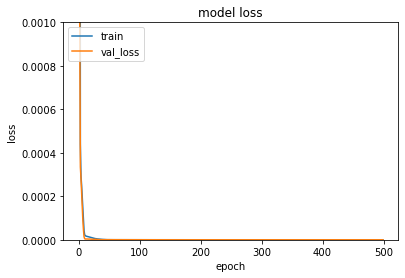

In [9]:
## Losses plotted ##

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
plt.ylim(0,0.001)

plt.show()



FEM: end displacement is 112.5 mm, rotation 9.669 deg
MBD: end displacement is 109.54 mm, rotation 9.464 deg
10001


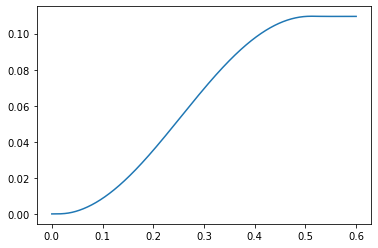

In [10]:
### Creating testing data ###
# Values are same as before except the Fy force #
    
dframe3, timeframe, sid = dframefunc(900)

X2 = dframe3.iloc[:-1]
Y2 = dframe3.iloc[1: , :]

In [11]:
#### Test ####
#np.set_printoptions(threshold=sys.maxsize)

results = model.evaluate(X, Y)
print(results)


xr = np.transpose(model.predict(np.array(X2)))

1250/1250 [==============================] - 1s 542us/step - loss: 3.3188e-08
3.318784180805778e-08


In [12]:
### Calculating the displacements ###

test_vals = X2.T.to_numpy() ## Creating numpy array from testdata so we can calculate results ##

    # Real results #
    
ny = test_vals.shape[0] // 2 + 1
r_end = np.empty((3, test_vals.shape[1]))

for i in range(test_vals.shape[1]):
    u_last = sid.nodes[-1].origin @ test_vals[14:ny, i]
    A_fb = rot(test_vals[10:14, i])
    r_fb = test_vals[7:10, i]
    r = r_fb + A_fb @ u_last
    r_end[:, i] = r

    
    # Simulated results #

ny2 = xr.shape[0] // 2 + 1 ## 
r_end2 = np.empty((3, xr.shape[1]))

for i in range(xr.shape[1]):
    u_last2 = sid.nodes[-1].origin @ xr[14:ny2, i]
    A_fb2 = rot(xr[10:14, i])
    r_fb2 = xr[7:10, i]
    r2 = r_fb2 + A_fb2 @ u_last2
    r_end2[:, i] = r2


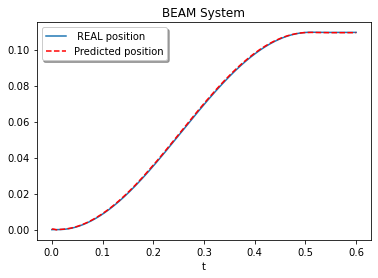

In [13]:
plt.plot(timeframe[:-1], r_end[1]) ## Timeframe is beign adjusted to sifting here
plt.plot(timeframe[:-1], r_end2[1], linestyle='dashed', color='red') ## Predicted position

plt.xlabel('t')
plt.legend([' REAL position',  'Predicted position'], shadow=True)
plt.title('BEAM System')
plt.show()